# 4.4 用于数组的文件输入输出
* np.save和np.load是读写磁盘数组数据的两个主要函数。默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中的：

In [1]:
import numpy as np
arr = np.arange(10)
np.save('data/arr4_4',arr)

* 如果文件路径末尾没有扩展名.npy，则该扩展名会被自动加上。然后就可以通过np.load读取磁盘上的数组：

In [2]:
np.load('data/arr4_4.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

---
* 通过np.savez可以将多个数组保存到一个未压缩文件中，将数组以关键字参数的形式传入即可：

In [3]:
np.savez('data/arr2',a = arr,b = arr)

* 加载.npz文件时，你会得到一个类似字典的对象，该对象会对各个数组进行延迟加载：

In [5]:
arch = np.load('data/arr2.npz')

In [6]:
arch

In [7]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* 如果要将数据压缩，可以使用numpy.savez_compressed：

In [10]:
np.savez_compressed('data/arr_c', a=arr, b=arr)
arch_c = np.load('data/arr_c.npz')
arch_c['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

---
# 4.5 线性代数
* 线性代数（如矩阵乘法、矩阵分解、行列式以及其他方阵数学等）是任何数组库的重要组成部分。NumPy提供了一个用于矩阵乘法的dot函数（既是一个数组方法也是numpy命名空间中的一个函数）：

In [11]:
x = np.array([[1.,2.,3.],[4.,5.,6.]]) # 2*3
y = np.array([[6.,23.],[-1,7],[8,9]]) # 3*2
x.shape

(2, 3)

In [13]:
y.shape

(3, 2)

In [14]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [17]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [16]:
y.dot(x)

array([[ 98., 127., 156.],
       [ 27.,  33.,  39.],
       [ 44.,  61.,  78.]])

In [18]:
np.dot(x,np.ones(3))

array([ 6., 15.])

* @符（类似Python 3.5）也可以用作中缀运算符，进行矩阵乘法：

In [19]:
x @ np.ones(3)

array([ 6., 15.])

* numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西。

In [20]:
from numpy.linalg import inv, qr
x = np.random.randn(4,4)
mat = x.T.dot(x)

In [21]:
inv(mat)

array([[ 0.50702595, -0.28791603,  0.4570192 , -0.14654526],
       [-0.28791603,  0.40540502, -0.29158042,  0.05235195],
       [ 0.4570192 , -0.29158042,  0.80747918, -0.00928766],
       [-0.14654526,  0.05235195, -0.00928766,  0.20829679]])

In [22]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -1.52444683e-16, -1.11511175e-16,
        -4.02052203e-17],
       [ 3.37610221e-17,  1.00000000e+00,  1.72198679e-16,
        -4.71043782e-17],
       [ 5.50819300e-18,  2.02890918e-16,  1.00000000e+00,
        -8.85318977e-17],
       [-3.16052216e-16, -2.15635693e-16, -1.67937697e-16,
         1.00000000e+00]])

In [23]:
q,r = qr(mat)

In [24]:
q

array([[-0.77548533,  0.0043827 , -0.2852031 , -0.56326058],
       [-0.24086517, -0.9177352 ,  0.24342703,  0.20121967],
       [ 0.3465336 , -0.3313558 , -0.87683719, -0.03569799],
       [-0.46959656,  0.21896627, -0.30093026,  0.80060841]])

In [25]:
r

array([[-10.34633407,  -3.23487137,   5.01916012,  -8.49669725],
       [  0.        ,  -3.77022548,  -1.7496923 ,   1.92078998],
       [  0.        ,   0.        ,  -1.10307742,  -1.49390334],
       [  0.        ,   0.        ,   0.        ,   3.84359459]])

---
* 表4-7中列出了一些最常用的线性代数函数。

![1](https://upload-images.jianshu.io/upload_images/7178691-dcdb66e49e5f70ea.png)

# 4.6伪随机数的生成

In [33]:
#normal来得到一个标准正态分布的4×4样本数组：
samples = np.random.normal(size=(4,4))
samples

array([[-0.75844998,  0.69982762,  0.53381605, -1.7029996 ],
       [-0.62646752,  1.23269211,  1.70220909, -0.34761098],
       [ 1.04148757,  0.55228306,  0.97988333, -1.49377064],
       [ 0.63556133,  2.59974275,  1.91282199,  1.06393808]])

* 而Python内置的random模块则只能一次生成一个样本值。从下面的测试结果中可以看出，如果需要产生大量样本值，numpy.random快了不止一个数量级：

In [35]:
from random import normalvariate
N=1000000
%timeit samples = [normalvariate(0,1) for _ in range(N)]

1.18 s ± 43.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%timeit np.random.normal(size=N)

40.1 ms ± 6.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


* 我们说这些都是伪随机数，是因为它们都是通过算法基于随机数生成器种子，在确定性的条件下生成的。你可以用NumPy的np.random.seed更改随机数生成种子：

In [39]:
np.random.seed(1234)

* numpy.random的数据生成函数使用了全局的随机种子。要避免全局状态，你可以使用numpy.random.RandomState，创建一个与其它隔离的随机数生成器：

In [43]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

---
* 表4-8列出了numpy.random中的部分函数。

![4](https://upload-images.jianshu.io/upload_images/7178691-97ba09c96dab93a2.png)
![5](https://upload-images.jianshu.io/upload_images/7178691-6ed04fae3d1178e2.png)

# 4.7随机漫步
* 我们通过模拟随机漫步来说明如何运用数组运算。先来看一个简单的随机漫步的例子：从0开始，步长1和－1出现的概率相等。下面是一个通过内置的random模块以纯Python的方式实现1000步的随机漫步：

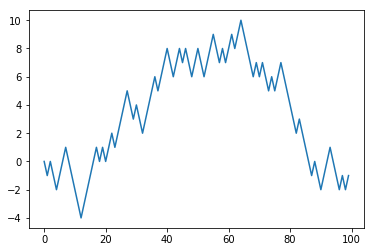

In [47]:
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:100])

In [59]:
nsteps = 1000
draws = np.random.randint(0,2,size=nsteps)
steps = np.where(draws>0,1,-1)
walk = steps.cumsum()

In [60]:
walk.min()

-31

In [61]:
walk.max()

13

* 现在来看一个复杂点的统计任务——首次穿越时间，即随机漫步过程中第一次到达某个特定值的时间。假设我们想要知道本次随机漫步需要多久才能距离初始0点至少10步远（任一方向均可）。np.abs(walk)>=10可以得到一个布尔型数组，它表示的是距离是否达到或超过10，而我们想要知道的是第一个10或－10的索引。可以用argmax来解决这个问题，它返回的是该布尔型数组第一个最大值的索引（True就是最大值）：

In [62]:
(np.abs(walk) >= 10).argmax()

37

* 注意：这里使用argmax并不是很高效，因为它无论如何都会对数组进行完全扫描。在本例中，只要发现了一个True，那我们就知道它是个最大值了。

#### 一次模拟多个随机漫步
* 如果你希望模拟多个随机漫步过程（比如5000个），只需对上面的代码做一点点修改即可生成所有的随机漫步过程。只要给numpy.random的函数传入一个二元元组就可以产生一个二维数组，然后我们就可以一次性计算5000个随机漫步过程（一行一个）的累计和了：

In [64]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks,nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[ -1,  -2,  -3, ..., -12, -13, -12],
       [  1,   0,   1, ...,  46,  45,  44],
       [  1,   0,  -1, ...,   6,   7,   8],
       ...,
       [ -1,   0,   1, ...,  -6,  -5,  -4],
       [ -1,  -2,  -1, ..., -18, -19, -18],
       [  1,   0,  -1, ...,  24,  23,  22]], dtype=int32)

In [65]:
walks.max()

122

In [66]:
walks.min()

-128

* 得到这些数据之后，我们来计算30或－30的最小穿越时间。这里稍微复杂些，因为不是5000个过程都到达了30。我们可以用any方法来对此进行检查：

In [67]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ..., False,  True,  True])

In [68]:
hits30.sum()

3367

* 然后我们利用这个布尔型数组选出那些穿越了30（绝对值）的随机漫步（行），并调用argmax在轴1上获取穿越时间：

In [72]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [73]:
crossing_times.mean()

510.26343926343924

---
结束啦，放学！

---